In [1]:
# python -m pip install prophet

In [16]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfBTC = pd.read_csv('./data/btc-usd-max.csv')
dfBTC.drop(["market_cap", "total_volume"], axis=1, inplace=True)
dfBTC['price'].fillna(method='ffill', inplace=True)
dfBTC.columns = ['ds','y']


In [17]:
dfBTC['ds'] = pd.to_datetime(dfBTC['ds'])
dfBTC['ds'] = dfBTC['ds'].dt.tz_localize(None)

In [18]:
dfBTC.head()

,ds,y
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [19]:
dfBTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3432 non-null   datetime64[ns]
 1   y       3432 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.8 KB


In [21]:
train = dfBTC.iloc[:-365]
test = dfBTC.iloc[-365:]

In [22]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=365,freq = 'D')

# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,718.446343,-3357.733054,8200.140389,718.446343,718.446343,1606.064401,1606.064401,1606.064401,30.71609,...,13.560721,13.560721,13.560721,1561.787590,1561.787590,1561.787590,0.0,0.0,0.0,2324.510744
1,2013-04-29,717.858622,-3578.270493,8069.755509,717.858622,717.858622,1582.267124,1582.267124,1582.267124,30.71609,...,-6.095323,-6.095323,-6.095323,1557.646357,1557.646357,1557.646357,0.0,0.0,0.0,2300.125746
2,2013-04-30,717.270901,-3255.123307,8439.043940,717.270901,717.270901,1569.633989,1569.633989,1569.633989,30.71609,...,-10.402561,-10.402561,-10.402561,1549.320461,1549.320461,1549.320461,0.0,0.0,0.0,2286.904890
3,2013-05-01,716.683179,-3628.497194,7878.788211,716.683179,716.683179,1554.394587,1554.394587,1554.394587,30.71609,...,-12.122732,-12.122732,-12.122732,1535.801229,1535.801229,1535.801229,0.0,0.0,0.0,2271.077766
4,2013-05-02,716.095458,-3161.897832,7536.780064,716.095458,716.095458,1555.138512,1555.138512,1555.138512,30.71609,...,8.272221,8.272221,8.272221,1516.150201,1516.150201,1516.150201,0.0,0.0,0.0,2271.233970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,2022-09-17,77808.520010,68936.362078,83812.860070,73315.868638,82491.491237,-1334.691274,-1334.691274,-1334.691274,30.71609,...,19.064605,19.064605,19.064605,-1384.471969,-1384.471969,-1384.471969,0.0,0.0,0.0,76473.828736
3428,2022-09-18,77885.493010,68993.826150,84004.525905,73379.108659,82597.141272,-1358.790727,-1358.790727,-1358.790727,30.71609,...,13.560721,13.560721,13.560721,-1403.067538,-1403.067538,-1403.067538,0.0,0.0,0.0,76526.702282
3429,2022-09-19,77962.466009,69118.431716,83609.480138,73442.348681,82702.791307,-1396.558539,-1396.558539,-1396.558539,30.71609,...,-6.095323,-6.095323,-6.095323,-1421.179305,-1421.179305,-1421.179305,0.0,0.0,0.0,76565.907470
3430,2022-09-20,78039.439008,69366.503000,83953.693902,73505.588703,82806.619548,-1418.697543,-1418.697543,-1418.697543,30.71609,...,-10.402561,-10.402561,-10.402561,-1439.011071,-1439.011071,-1439.011071,0.0,0.0,0.0,76620.741466


<AxesSubplot:xlabel='ds'>

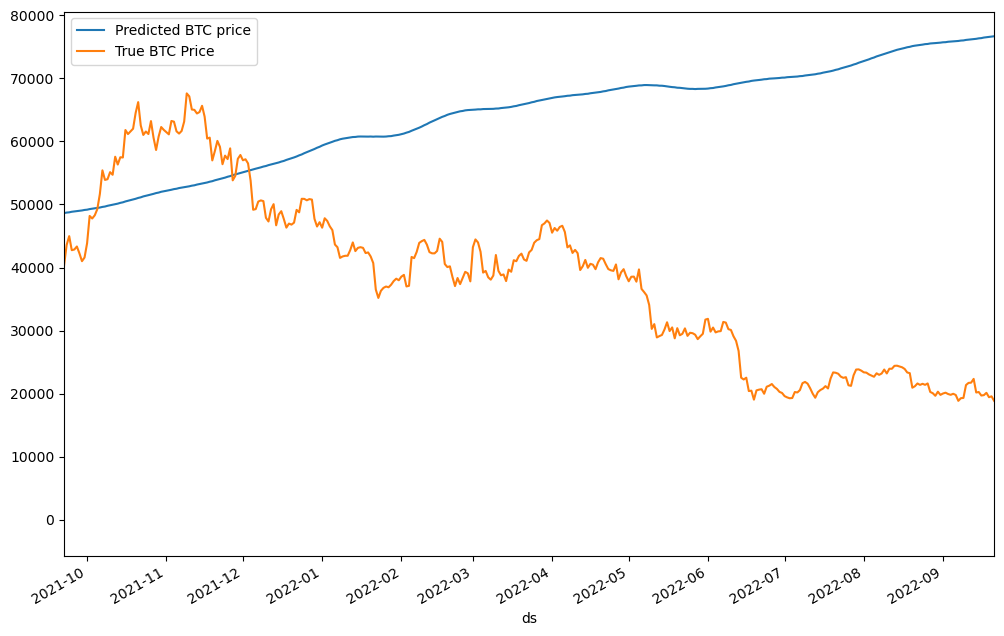

In [30]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted BTC price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True BTC Price',legend=True,ax=ax,xlim=('2021-09-22','2022-09-21'))

In [31]:
from statsmodels.tools.eval_measures import rmse

In [33]:
predictions = forecast.iloc[-365:]['yhat']

In [34]:
rmse(predictions,test['y'])

33116.702009873785

In [38]:
# very large difference as it is roughly as equal as the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_4064\2842870996.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    38428.184895
dtype: float64

In [37]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [39]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [40]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:prophet:Making 3 forecasts with cutoffs between 2018-09-22 00:00:00 and 2020-09-21 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [41]:
# thgis is the raw dataset that is returned via the above
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,3.275386e+06,1809.802849,1417.551597,0.189183,0.089745,0.166103,0.590214
1,38 days,3.390187e+06,1841.245972,1448.277832,0.192750,0.090580,0.168996,0.590214
2,39 days,3.519437e+06,1876.016210,1482.680602,0.196448,0.095976,0.172192,0.584098
3,40 days,3.651494e+06,1910.888390,1519.300864,0.200140,0.098219,0.175554,0.574924
4,41 days,3.797285e+06,1948.662414,1561.096472,0.204231,0.106832,0.179403,0.565749
...,...,...,...,...,...,...,...,...
324,361 days,3.964546e+08,19911.166598,12168.127768,0.305951,0.126337,0.440148,0.666667
325,362 days,3.980301e+08,19950.692708,12200.625350,0.307068,0.126337,0.441428,0.666667
326,363 days,3.991984e+08,19979.950500,12217.343378,0.307232,0.129317,0.441740,0.666667
327,364 days,3.994357e+08,19985.887279,12221.259369,0.307429,0.129317,0.441970,0.666667


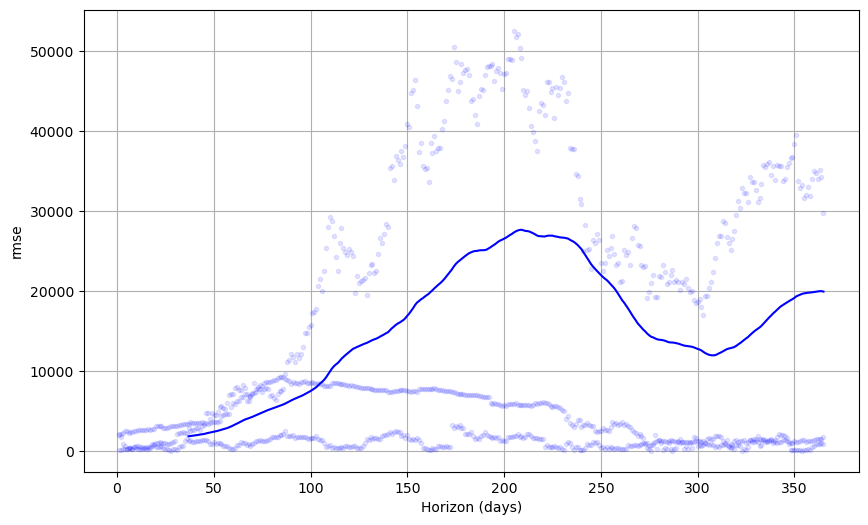

In [42]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
plot_cross_validation_metric(df_cv, metric='rmse');

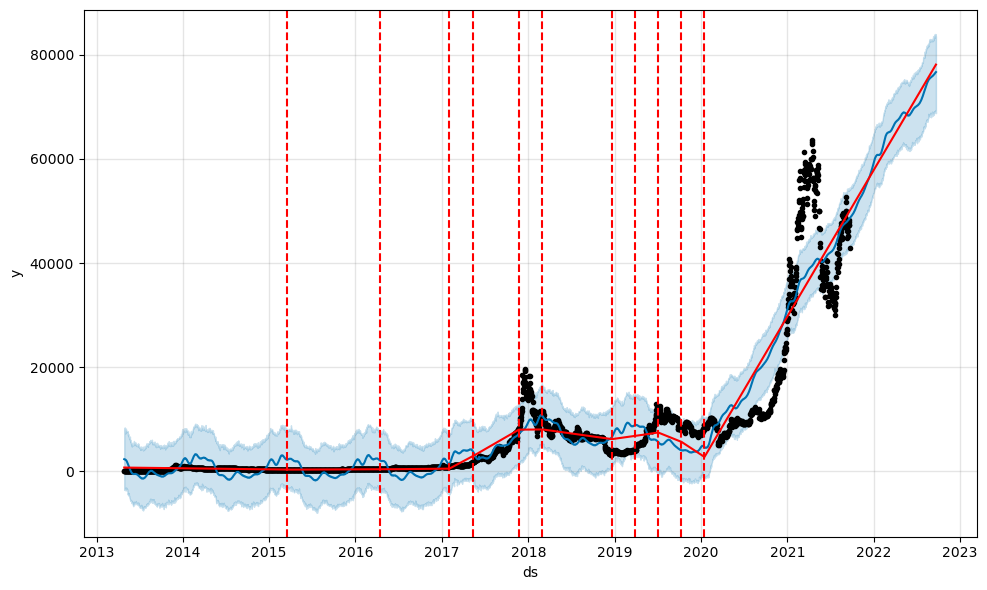

In [43]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [11]:
# forecast functionality of prophet with matplotlib that can run on the m object of the prophet model
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,2049.059456,-5873.198783,11965.095325,2049.059456,2049.059456,583.672065,583.672065,583.672065,-1187.485398,...,-2.114027,-2.114027,-2.114027,1773.271491,1773.271491,1773.271491,0.0,0.0,0.0,2632.731521
1,2013-04-29,2048.197069,-5820.076513,12451.913418,2048.197069,2048.197069,529.221570,529.221570,529.221570,-1187.485398,...,-13.256725,-13.256725,-13.256725,1729.963693,1729.963693,1729.963693,0.0,0.0,0.0,2577.418639
2,2013-04-30,2047.334683,-6398.131324,11266.310804,2047.334683,2047.334683,487.402591,487.402591,487.402591,-1187.485398,...,-5.706550,-5.706550,-5.706550,1680.594539,1680.594539,1680.594539,0.0,0.0,0.0,2534.737273
3,2013-05-01,2046.472296,-6724.469118,11019.994150,2046.472296,2046.472296,416.056040,416.056040,416.056040,-1187.485398,...,-20.896028,-20.896028,-20.896028,1624.437466,1624.437466,1624.437466,0.0,0.0,0.0,2462.528337
4,2013-05-02,2045.609910,-7156.340398,11063.459551,2045.609910,2045.609910,418.877288,418.877288,418.877288,-1187.485398,...,45.460920,45.460920,45.460920,1560.901766,1560.901766,1560.901766,0.0,0.0,0.0,2464.487198


In [12]:
# we will just grab some of the columns we are interested in and just the tail that interests us
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1450)

,ds,yhat,yhat_lower,yhat_upper
3432,2022-09-22,38996.106930,29995.140340,48199.811022
3433,2022-09-23,39047.549172,30026.571389,47732.005998
3434,2022-09-24,39154.239851,29878.464318,47571.722775
3435,2022-09-25,39260.034352,31085.239730,48412.654496
3436,2022-09-26,39359.157543,30374.474281,48664.633298
...,...,...,...,...
4877,2026-09-06,56374.894279,9004.118623,104335.939994
4878,2026-09-07,56338.256082,8593.182985,105155.951403
4879,2026-09-08,56327.880786,5504.552434,103749.369829
4880,2026-09-09,56302.933528,5816.931252,105720.032664


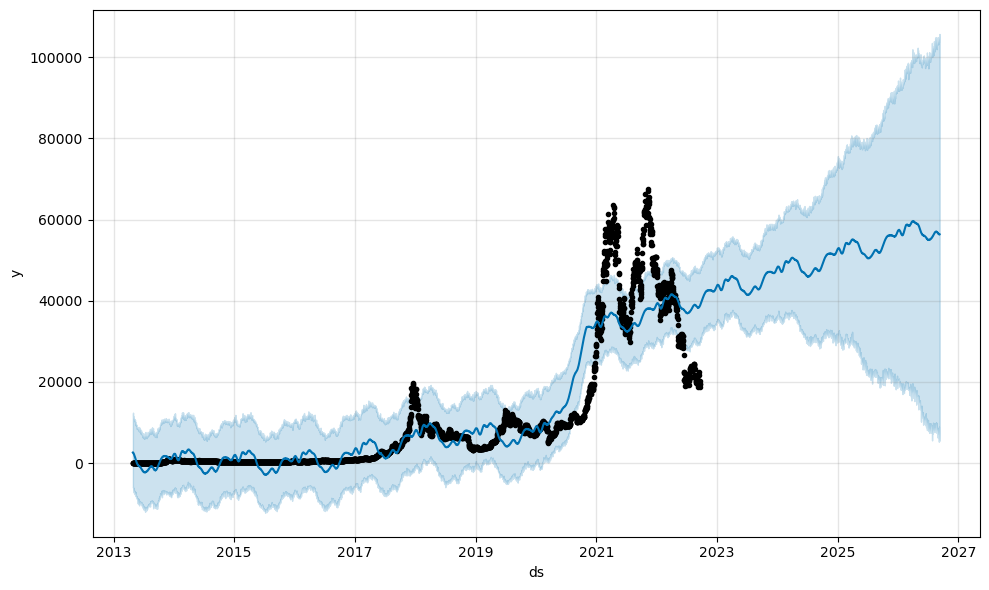

In [14]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



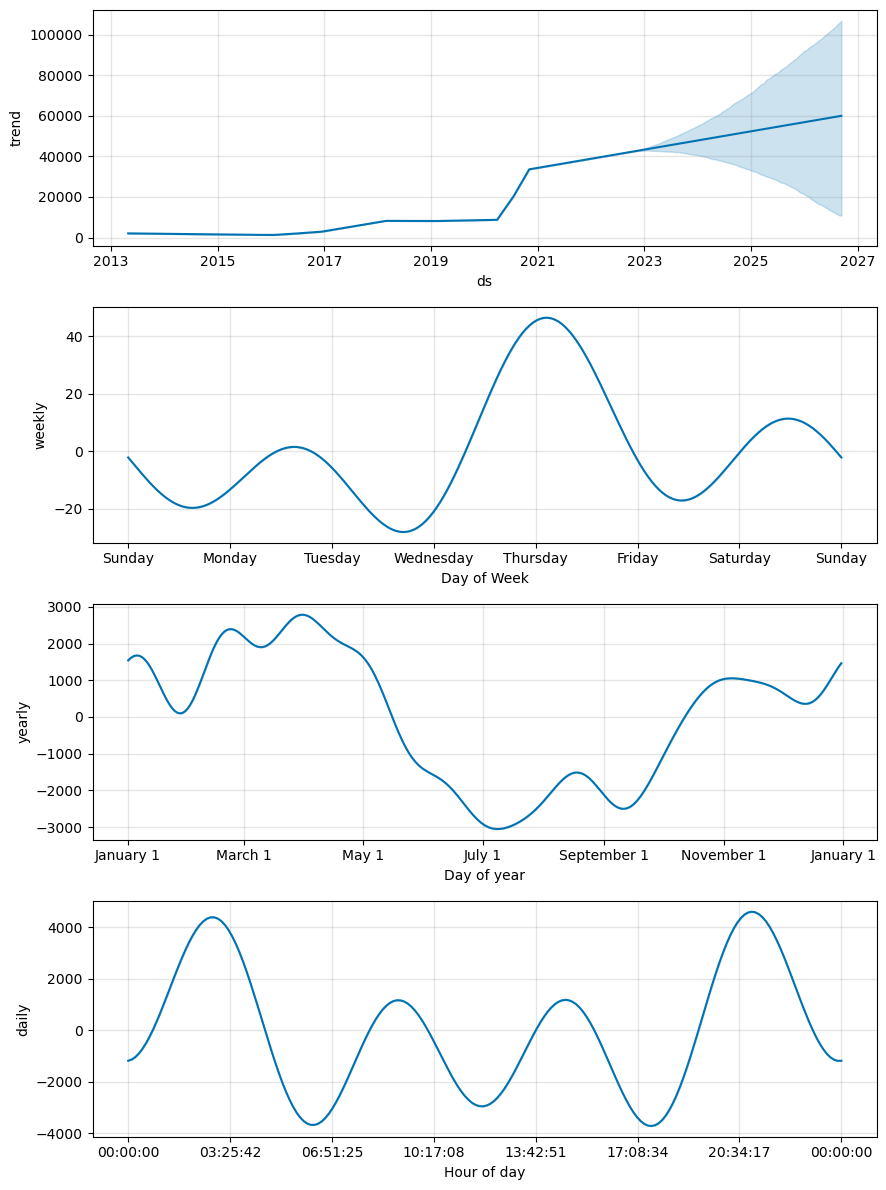

In [15]:
m.plot_components(forecast);

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



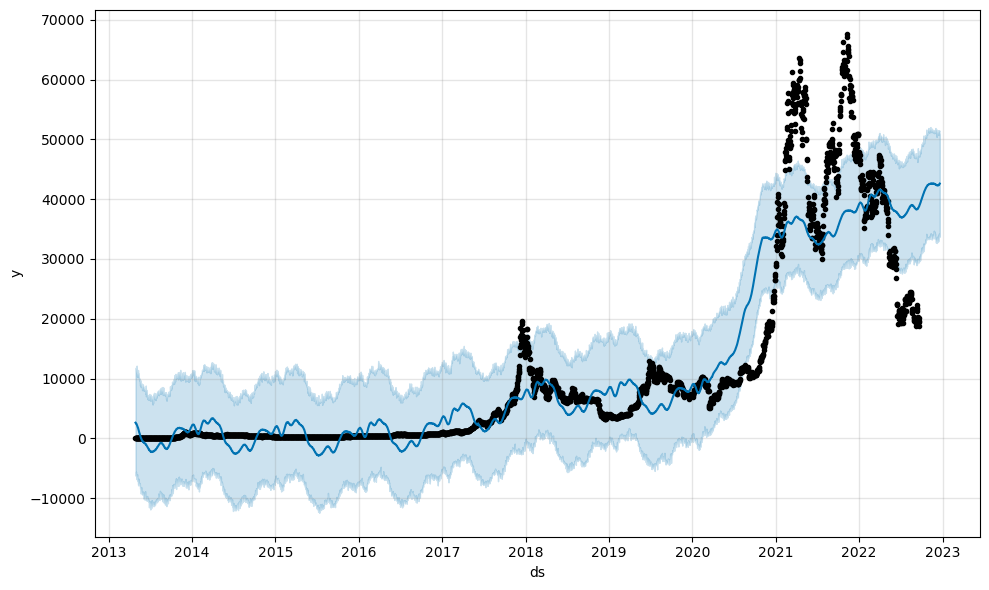

In [48]:
# changing seasonality from an additive to a multiplicative component
m = Prophet()
m.fit(dfBTC)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=90,freq = 'D')

# to make predictions 
forecast = m.predict(future)
fig = m.plot(forecast)